# FRAUD DETECTION

This notebook should help you get started with any competition on Zindi. In it we cover:
- Loading the data
- Simple EDA and an example of feature enginnering

# Setup

Load the data into the notebook.

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##Supress warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier

.








## Load the client training dataset

In [2]:
client_train = pd.read_csv('client_train.csv')
client_train.head(5)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


.
.

## Check the shape of the client  training dataset

In [3]:
client_train.shape

(135493, 6)

## Load the client testing dataset

In [4]:
client_test = pd.read_csv('client_test.csv')
client_test.head(5)

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


.
.

## Check the shape of the client  training dataset

In [5]:
client_test.shape

(58069, 5)

.
## Load the invoice training dataset

In [6]:
invoice_train = pd.read_csv('invoice_train.csv')
invoice_train.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


.
.
## Check the shape of the invoice training dataset

In [7]:
invoice_train.shape

(4476749, 16)

.
.
## Load the invoice testing dataset

In [8]:
invoice_test = pd.read_csv('invoice_test.csv')
invoice_test.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


.
.
## Check the shape of the invoice testing dataset

In [9]:
invoice_test.shape

(1939730, 16)

## Take a look at the sample submission

In [10]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.head(5)

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046



# . 

# Missing values
Let's check if there's any missing values in our data.

In [11]:
client_train.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [12]:
client_test.isnull().sum() 

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64

In [13]:
invoice_train.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [14]:
invoice_test.isnull().sum() 

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

# Combining the data sets

In [15]:
new_df = invoice_train.merge(client_train, left_on='client_id', right_on='client_id',
          suffixes=('', None))
new_df_test = invoice_test.merge(client_test, left_on='client_id', right_on='client_id',
          suffixes=('', None))
new_df_test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,62,11,307,28/05/2002
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,62,11,307,28/05/2002
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,62,11,307,28/05/2002
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,62,11,307,28/05/2002
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,62,11,307,28/05/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,69,11,104,14/03/1990
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,69,11,104,14/03/1990
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,69,11,104,14/03/1990
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,69,11,104,14/03/1990


## Check for NaN values to make sure everything went well

In [16]:
new_df.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
disrict                 0
client_catg             0
region                  0
creation_date           0
target                  0
dtype: int64

# .
# EDA + Feature Engineering

<AxesSubplot:>

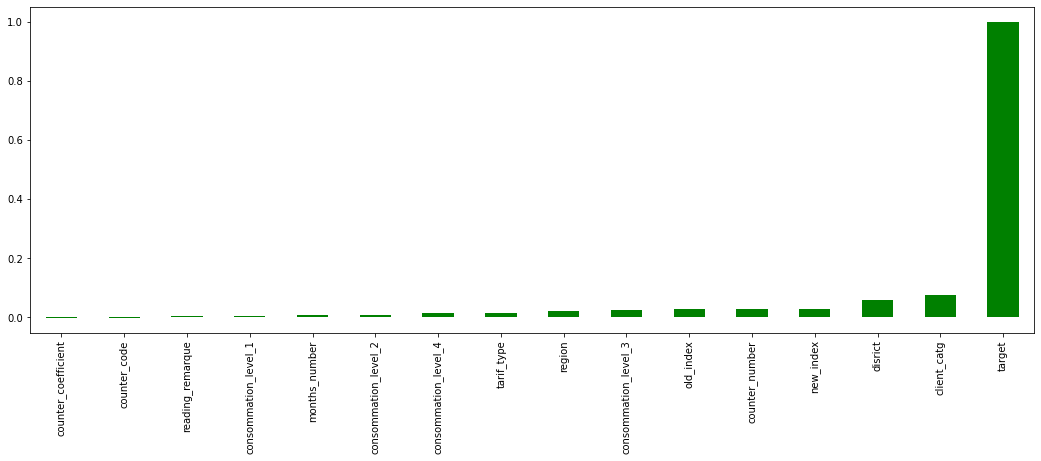

In [17]:
# Look at correlation with target
new_df.corr()['target'].sort_values().plot(kind='bar', color ='g', figsize=(18, 6))


.


## Take a look at the correlation between the variables

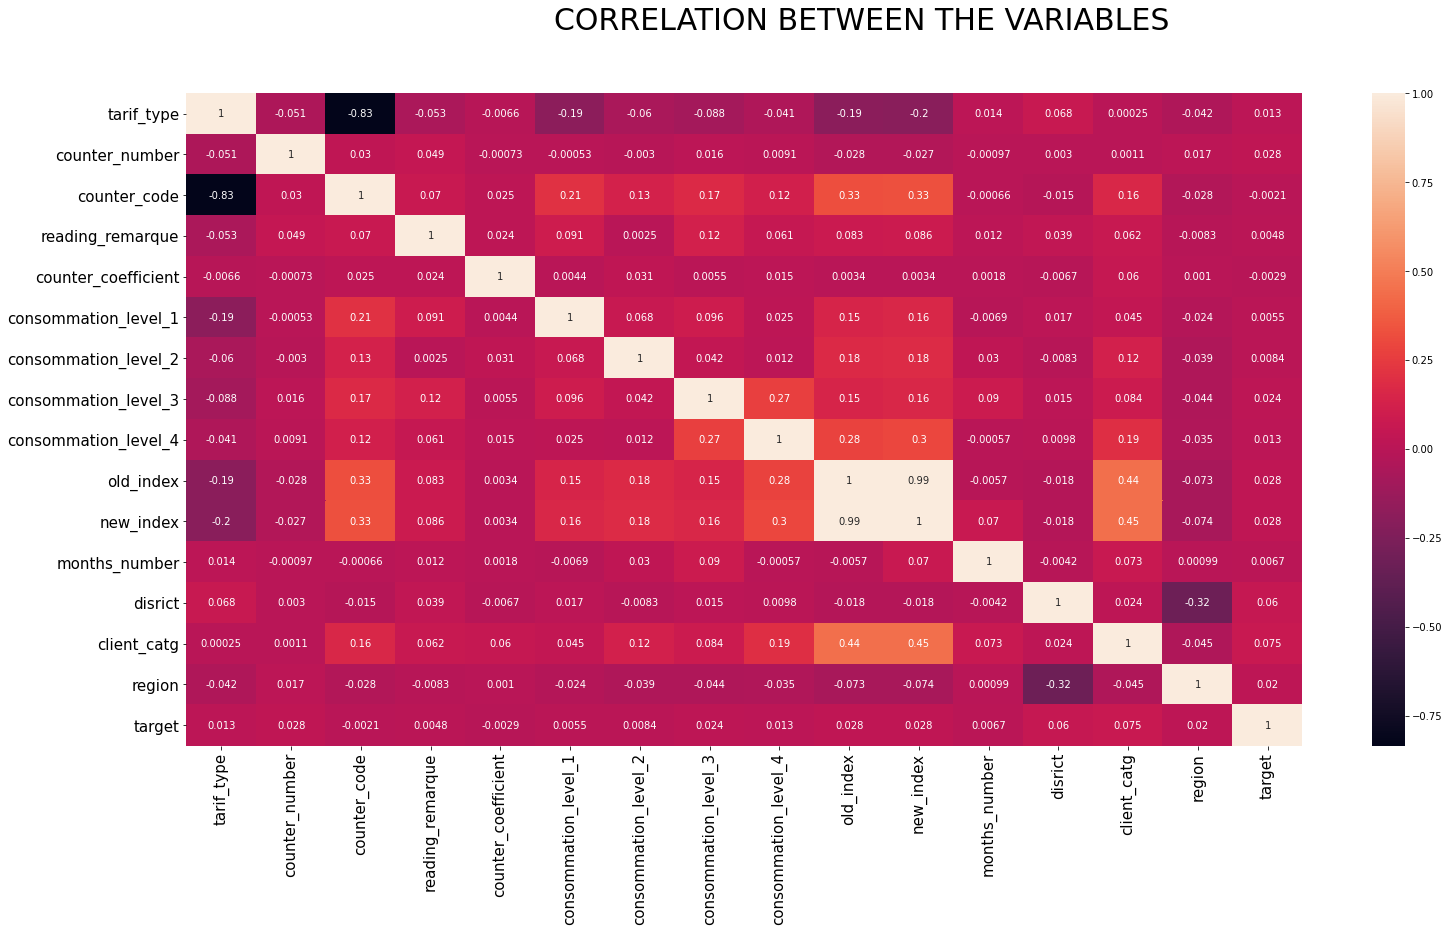

In [18]:
Correlation  = new_df.corr(method = 'pearson')

plt.figure(figsize=(25,12))
sns.heatmap(Correlation, annot=True)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.suptitle("CORRELATION BETWEEN THE VARIABLES", fontsize = 30)
plt.show()

From the correlation heatmap, we observe that the avariables (old index and new index) are strongly correlated.Putting features that are highly correlated to a model brings the problem of collinearity and could lower the performance of a model. You can decide to train one model with all the features, and then another with only the poorly correlated features and compare their accuracy.

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   invoice_date          object 
 2   tarif_type            int64  
 3   counter_number        int64  
 4   counter_statue        object 
 5   counter_code          int64  
 6   reading_remarque      int64  
 7   counter_coefficient   int64  
 8   consommation_level_1  int64  
 9   consommation_level_2  int64  
 10  consommation_level_3  int64  
 11  consommation_level_4  int64  
 12  old_index             int64  
 13  new_index             int64  
 14  months_number         int64  
 15  counter_type          object 
 16  disrict               int64  
 17  client_catg           int64  
 18  region                int64  
 19  creation_date         object 
 20  target                float64
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


## Simple Feature engineering

#### Trend of of electricty fraud, based off of the month of joining 

<AxesSubplot:xlabel='joining_month'>

<Figure size 1440x1080 with 0 Axes>

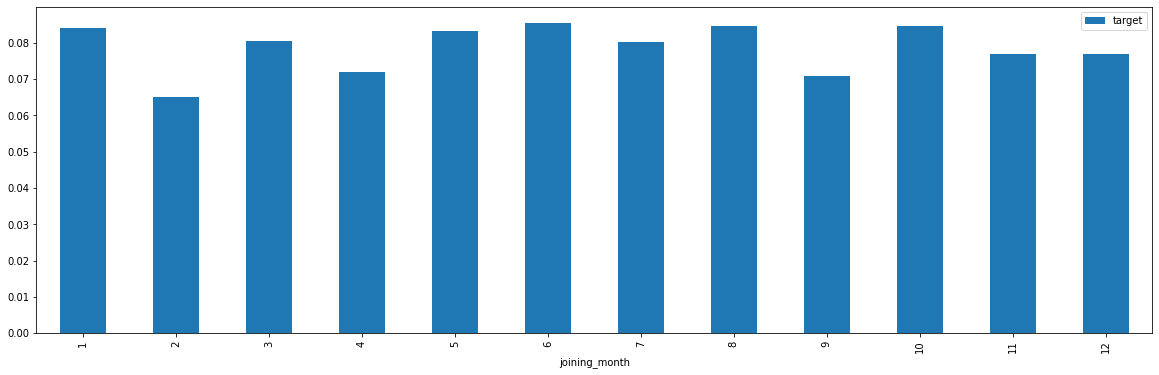

In [20]:

new_df['creation_date'] = pd.to_datetime(new_df['creation_date'])
new_df_test['creation_date'] = pd.to_datetime(new_df_test['creation_date'])

# Date variables
new_df_test['joining_month'] = new_df_test['creation_date'].dt.month
new_df_test['joining_year'] = new_df_test['creation_date'].dt.year

new_df['joining_month'] = new_df['creation_date'].dt.month
new_df['joining_year'] = new_df['creation_date'].dt.year


plt.figure(figsize = (20, 15))
new_df.groupby('joining_month').mean().reset_index().plot(y='target', x='joining_month', kind='bar', figsize = (20,6))

In [21]:
new_df

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target,joining_month,joining_year
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,14384,4,ELEC,60,11,101,1994-12-31,0.0,12,1994
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,13678,4,ELEC,60,11,101,1994-12-31,0.0,12,1994
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,14747,4,ELEC,60,11,101,1994-12-31,0.0,12,1994
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,14849,4,ELEC,60,11,101,1994-12-31,0.0,12,1994
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,15638,12,ELEC,60,11,101,1994-12-31,0.0,12,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,3732,8,ELEC,60,11,101,1993-12-22,0.0,12,1993
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,...,3938,4,ELEC,60,11,101,1993-12-22,0.0,12,1993
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,...,14143,4,ELEC,60,11,101,1986-02-18,0.0,2,1986
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,...,13884,4,ELEC,60,11,101,1986-02-18,0.0,2,1986


## Trend of of electricty fraud, based off of the year of joining 

<AxesSubplot:xlabel='joining_year'>

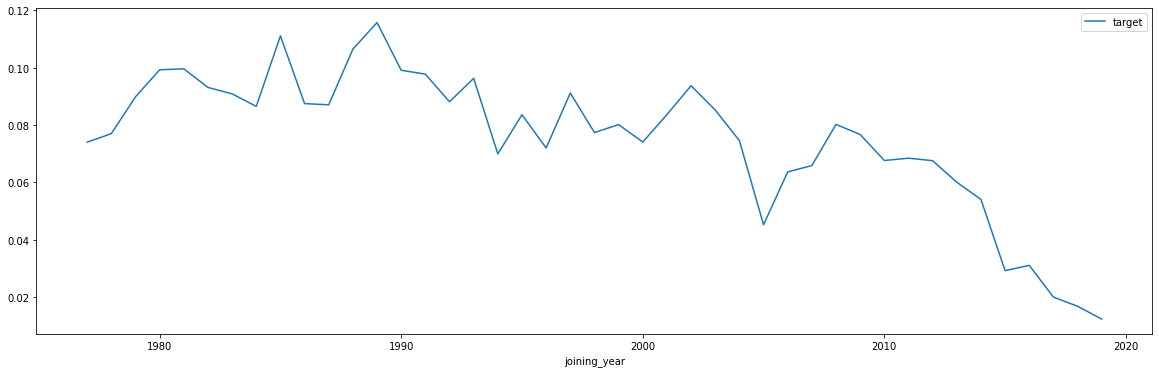

In [22]:
new_df.groupby('joining_year').mean().reset_index().plot(y='target', x='joining_year',figsize = (20,6))

## You can do more!!!

You can continue to look at different features and make visualizations that would allow yoiu to better understand the data

# Model Evaluation

We already have split datasets, so no need of splitting them more.

And since the target has a high correlation with each independent variable, we shall incorporate all.

## Convert objects and datetime to numerical for regression to work

In [42]:

y_train = new_df['target']
X_train = new_df[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]

X_test = new_df_test[['tarif_type', 'counter_number',
        'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number',  'disrict', 'client_catg',
       'region', 'joining_month', 'joining_year']]


In [52]:
# Simple regression model
linear_regression_model = LinearRegression().fit(X_train,y_train)
y_pred = linear_regression_model.predict(X_test)
r_sq = linear_regression_model.score(X_test,y_pred)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [53]:
# KNN
# Random Forest
neigh = Neare
# Logistic Regression
logistic_regression = LogisticRegression().fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
logistic_regression.score(X_test,y_pred)

1.0